In [5]:
import numpy as np

# определим функцию Розенброка 
def func_rosen(x):
    r = np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)
    return r

In [6]:
import matplotlib.pyplot as plt
graph = plt.figure(figsize=[25, 15])
ax = graph.gca(projection ='3d')
ax.view_init(45, 30)
x1 = np.arange(-3, 3, 0.2)
x2 = np.arange(-2, 4, 0.2)
x1, x2 = np.meshgrid(x1, x2)
y = func_rosen(np.array([x1,x2]))
surf = ax.plot_surface(x1, x2, y)
plt.show()
# должен получиться график этой функции

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 2500x1500 with 0 Axes>

In [12]:
# в качестве алгоритма оптимизации используем метод Пауэлла
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='powell')
print('Точка минимума:', result_point.x)

Точка минимума: [1. 1. 1. 1. 1.]


In [14]:
# допустим, у нас есть некоторая точка  в пятимерном пространстве
# найдём ближайшую к ней точку минимума функции Розенброка, используя алгоритм метода Недлера-Мида (симплекс-метод)
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='nelder-mead')
print('Точка минимума:', result_point.x)
# результаты отличаются, но это норм

Точка минимума: [1.02760651 1.05589639 1.11509457 1.2440091  1.54862169]


In [17]:
# оптимизируем ф-ю Розенброка с помощью МНК (ф-я least_squares)
from scipy.optimize import least_squares
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = least_squares(func_rosen, x1)
print('Точка минимума:', result_point.x)

Точка минимума: [0.93865173 0.88210868 0.776457   0.60278764 0.36076162]


In [18]:
# решаем задачу оптимизации (минимизации) расходов на изготовление товаров
from sympy import *
# w вместо лямбды
a,b,w=symbols(' a b w' )
g = 3*a**2 + a + 4*b + 5*b**2
print('Целевая функция для аргументов a и b :\n f = ', g)
q = a + b - 200
print('Функция ограничений: ', q,'= 0')
f = 3*a**2 + a + 4*b + 5*b**2 + w*(a + b - 200)
print('Функция Лагранжа :\n ',f)
fa = f.diff(a)
print('df/da =',fa,'= 0')
fb = f.diff(b)
print('df/db =',fb,'= 0')
fw = f.diff(w)
print('df/dw =',fw,'= 0')
sols = solve([fa,fb,fw],a,b,w)
print('Стационарная точка M(x,y):\n',float(sols[a]),',',float(sols[b]))

Целевая функция для аргументов a и b :
 f =  3*a**2 + a + 5*b**2 + 4*b
Функция ограничений:  a + b - 200 = 0
Функция Лагранжа :
  3*a**2 + a + 5*b**2 + 4*b + w*(a + b - 200)
df/da = 6*a + w + 1 = 0
df/db = 10*b + w + 4 = 0
df/dw = a + b - 200 = 0
Стационарная точка M(x,y):
 125.1875 , 74.8125


In [1]:
import numpy as np

In [3]:
# зададим массив, для которого хотим вычислить градиент
f = np.array([3, 7, 14, 23, 36, 47], dtype=float)
 
np.gradient(f)

array([ 4. ,  5.5,  8. , 11. , 12. , 11. ])

In [4]:
# на границах вектора - обычная разница для соседних элементов
print(f[1] - f[0], f[-1] - f[-2])

4.0 11.0


In [5]:
# а внутри вектора - разность сосединх значений, деленная на два
print((f[2] - f[0])/2)
print((f[3] - f[1])/2) 
print((f[4] - f[2])/2)
print((f[5] - f[3])/2)

5.5
8.0
11.0
12.0


In [6]:
# шаг можно варьировать
np.gradient(f, 2)

array([2.  , 2.75, 4.  , 5.5 , 6.  , 5.5 ])

In [7]:
f = np.array([8, 2, 8, 3, 5, 6, 5, 15])
np.gradient(f, 7)

array([-0.85714286,  0.        ,  0.07142857, -0.21428571,  0.21428571,
        0.        ,  0.64285714,  1.42857143])

# Градиентный спуск

In [1]:
# определим простейшую выпуклую функцию

def fun(x, y, a=1, b=1):
    return a * (x ** 2) + b * (y ** 2)

In [2]:
# определим функцию, которая считает градиент

def grad(x, y, a=1, b=1):
    return np.array([2 * a * x, 2 * b * y])

In [3]:
# запрограммируем простейший вариант для градиентного спуска

def grad_descend(grad, step_size=0.2, num_steps=30):
    lst = []
    x = np.random.uniform(0, 3, size = 2)
    lst.append(x)
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    return np.array(lst)

In [4]:
# функция, которая будет строить график

def plot_grad(fun, trace):
    fig = plt.figure(figsize=(10, 8))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6)
    ax.contour(x, y, z, zdir='z', offset=z.min())
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())

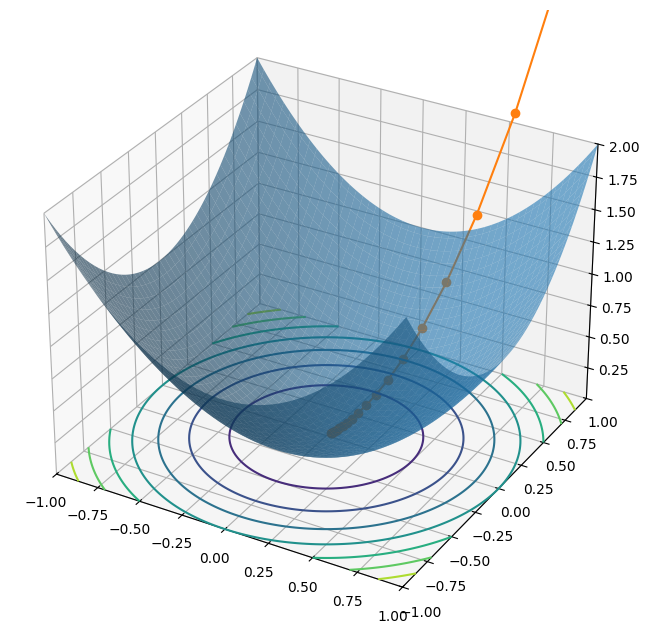

In [7]:
# отображено движение градиентного спуска к минимуму

trace = grad_descend(grad, 0.1, 20)
plot_grad(fun, trace = trace)

In [1]:
def f(x, y, z):
    return x**3 - 2*(x**2) + y**2 + z**2 - 2*x*y + x*z - y*z + 3*z
# создадим градиент (для этого посчитаем частные производные для функции и вернем их в виде кортежа)
def grad(x, y, z):
    dx = 3*(x**2) - 4*x - 2*y +z
    dy = 2*y - 2*x - z
    dz = 2*z + x - y + 3
    return (dx, dy, dz)

In [10]:
x0 = (0.1, 0.1)
# гамма это темп обучения/шаг градиентного спуска (его можно и нужно варьировать) 
# в первом случае поставили гамма = 0.1 и программа сломалась на 6 итерации, т к цифры были слишком большие 
# уменьшили - шамма = 0.01 - теперь кол-во итерация 39, но потом тоже встает
# еще уменьшили и теперь все четко
gamma = 0.1
# текущую точку мы обозначили за нашу первоначальную (потому что так пока что и есть)
x_cur = x0

vals = []
coords = []
i = 0
while True:
    x_new = (x_cur[0] - gamma * grad(*x_cur)[0],
            x_cur[1] - gamma * grad(*x_cur)[1])
    # обозначили ограничение для количества итераций (тоже можно менять) 
    # если значение градиента не равно нулю, не стоит сразу думать, что мы не попали в минимум
    # возможно не хватило кол-ва итераций, и надо просто увеличить его
    if i > 5000:
        break
    x_cur = x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i += 1
    # выводим номер итерации, значение текущей точки, значение функции в этой точке, градиент 
    # если градиент равен нулю, значит мы в минимуме
    print(f"iter={i}; x=({x_cur[0]:.2f}, {x_cur[1]:.2f});"
          f" f(x)={f(*x_cur):.2f}; grad f(x)=({grad(*x_cur)[0]:.2f}, {grad(*x_cur)[1]:.2f})")

iter=1; x=(0.10, 0.14); f(x)=1.96; grad f(x)=(-0.16, -0.39)
iter=2; x=(0.12, 0.18); f(x)=1.95; grad f(x)=(-0.25, -0.44)
iter=3; x=(0.14, 0.22); f(x)=1.92; grad f(x)=(-0.33, -0.52)
iter=4; x=(0.17, 0.27); f(x)=1.88; grad f(x)=(-0.40, -0.61)
iter=5; x=(0.21, 0.34); f(x)=1.82; grad f(x)=(-0.49, -0.70)
iter=6; x=(0.26, 0.41); f(x)=1.74; grad f(x)=(-0.57, -0.78)
iter=7; x=(0.32, 0.48); f(x)=1.64; grad f(x)=(-0.66, -0.83)
iter=8; x=(0.39, 0.57); f(x)=1.53; grad f(x)=(-0.72, -0.81)
iter=9; x=(0.46, 0.65); f(x)=1.41; grad f(x)=(-0.76, -0.74)
iter=10; x=(0.53, 0.72); f(x)=1.30; grad f(x)=(-0.75, -0.63)
iter=11; x=(0.61, 0.79); f(x)=1.21; grad f(x)=(-0.70, -0.50)
iter=12; x=(0.68, 0.84); f(x)=1.14; grad f(x)=(-0.62, -0.39)
iter=13; x=(0.74, 0.87); f(x)=1.09; grad f(x)=(-0.53, -0.30)
iter=14; x=(0.79, 0.90); f(x)=1.06; grad f(x)=(-0.44, -0.23)
iter=15; x=(0.84, 0.93); f(x)=1.04; grad f(x)=(-0.35, -0.17)
iter=16; x=(0.87, 0.94); f(x)=1.02; grad f(x)=(-0.28, -0.13)
iter=17; x=(0.90, 0.96); f(x)=1.0

In [5]:
from scipy import optimize

In [8]:
optimize.minimize(lambda x: f(*x), x0=(0, 0)) 

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.0
        x: [ 0.000e+00  0.000e+00]
      nit: 0
      jac: [ 2.980e-08  0.000e+00]
 hess_inv: [[1 0]
            [0 1]]
     nfev: 3
     njev: 1